In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.optimizers.schedules import ExponentialDecay
from keras.models import load_model
from itertools import chain

pd.options.mode.chained_assignment = None  # default='warn'

ModuleNotFoundError: No module named 'imblearn'

In [2]:
exoTrain = pd.read_csv('exoTrain.csv')
exoTest = pd.read_csv('exoTest.csv')

exoTrain.head(5)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [3]:
print(exoTrain['LABEL'].value_counts())
print(exoTest['LABEL'].value_counts())

1    5050
2      37
Name: LABEL, dtype: int64
1    565
2      5
Name: LABEL, dtype: int64


In [4]:
def flux_graph(dataset, row, dataframe, planet):
    if dataframe:
        fig = plt.figure(figsize=(20,5), facecolor=(.18, .31, .31))
        ax = fig.add_subplot()
        ax.set_facecolor('#004d4d')
        ax.set_title(planet, color='white', fontsize=22)
        ax.set_xlabel('time', color='white', fontsize=18)
        ax.set_ylabel('flux_' + str(row), color='white', fontsize=18)
        ax.grid(False)
        flux_time = list(dataset.columns)
        flux_values = dataset[flux_time].iloc[row]
        ax.plot([i + 1 for i in range(dataset.shape[1])], flux_values, '#00ffff')
        ax.tick_params(colors = 'black', labelcolor='#00ffff', labelsize=14)
        plt.show()
    else:
        fig = plt.figure(figsize=(20,5), facecolor=(.18, .31, .31))
        ax = fig.add_subplot()
        ax.set_facecolor('#004d4d')
        ax.set_title(planet, color='white', fontsize=22)
        ax.set_xlabel('time', color='white', fontsize=18)
        ax.set_ylabel('flux_' + str(row), color='white', fontsize=18)
        ax.grid(False)
        flux_values = dataset[row]
        ax.plot([i + 1 for i in range(dataset.shape[1])], flux_values, '#00ffff')
        ax.tick_params(colors = 'black', labelcolor='#00ffff', labelsize=14)
        plt.show()

In [5]:
def show_graph(dataframe, dataset):
    with_planet = exoTrain[exoTrain['LABEL'] == 2].head(3).index
    wo_planet = exoTrain[exoTrain['LABEL'] == 1].head(3).index

    for row in with_planet:
        flux_graph(dataset, row, dataframe, planet = 'with_planet')
    for row in wo_planet:
        flux_graph(dataset, row, dataframe, planet = 'wo_planet')

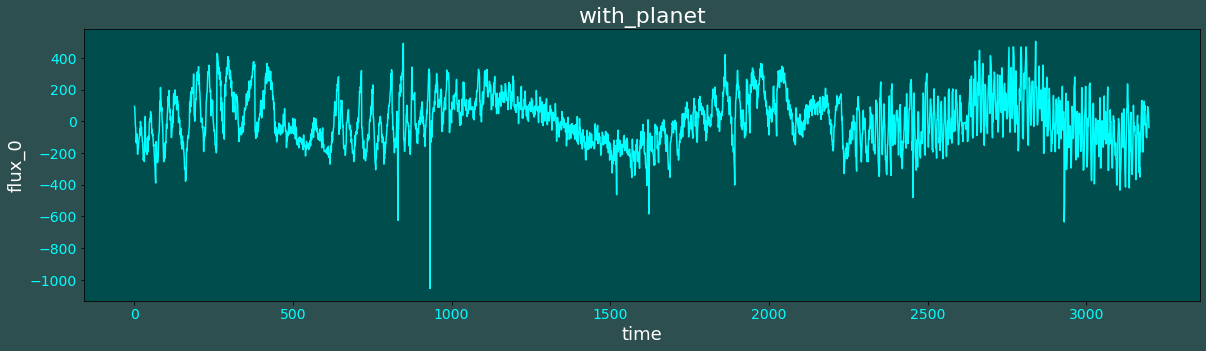

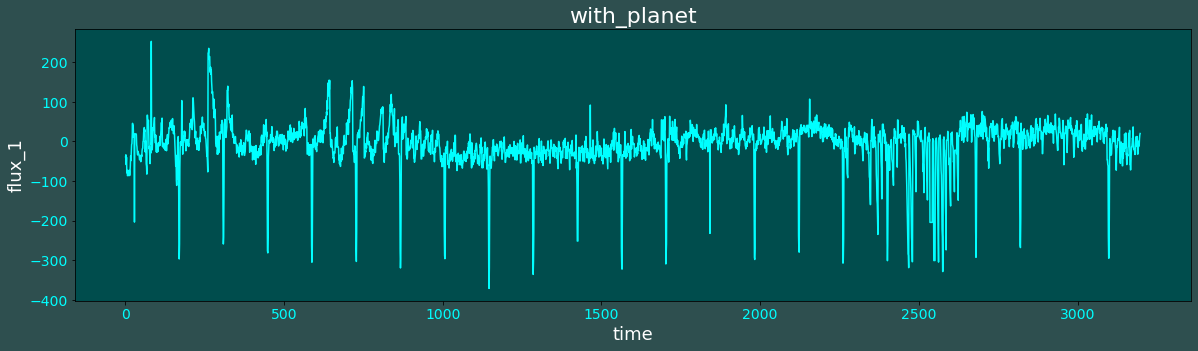

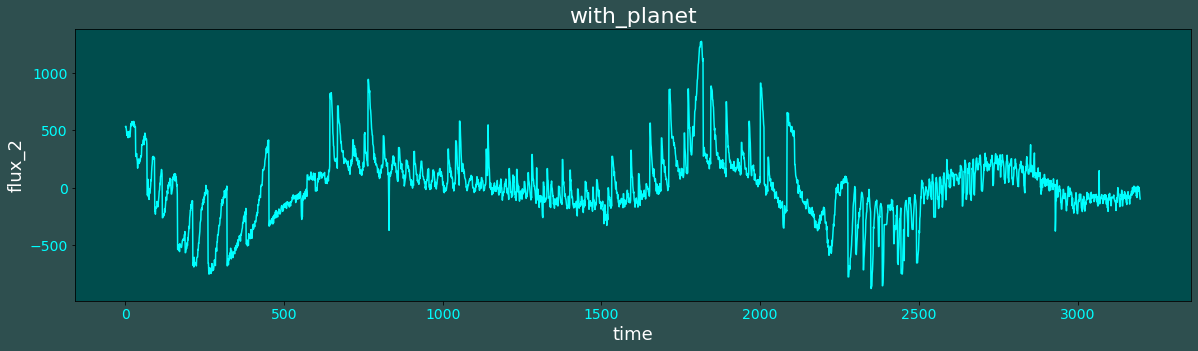

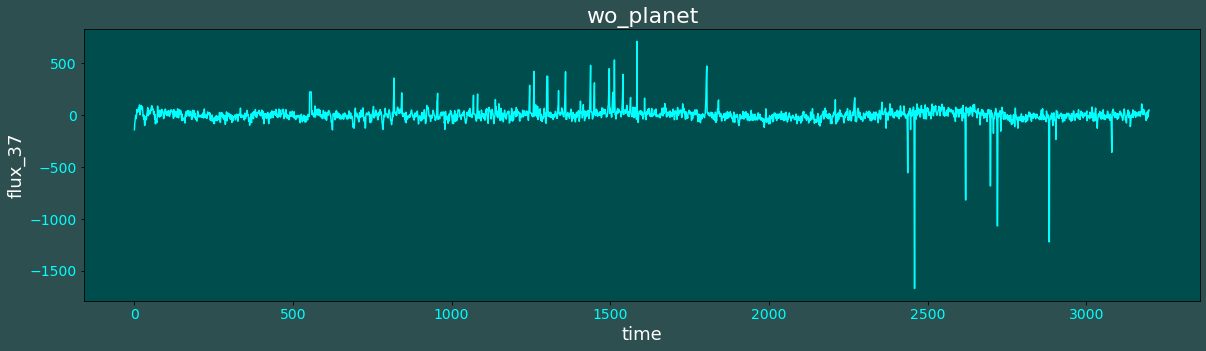

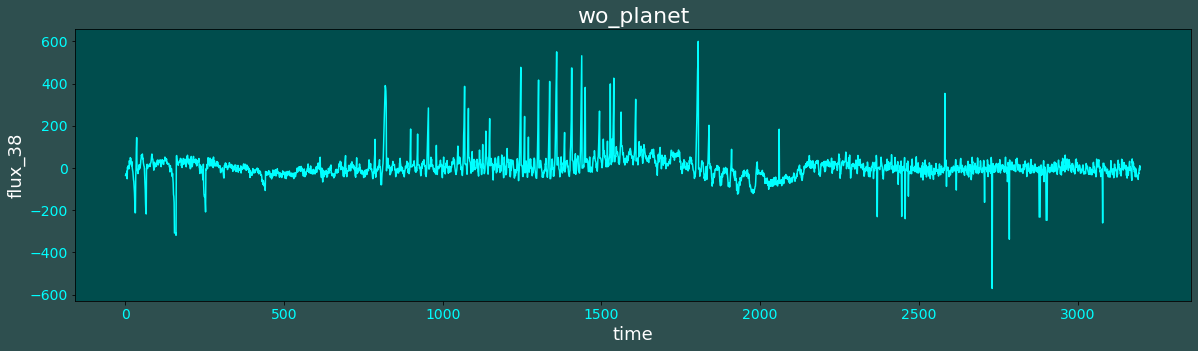

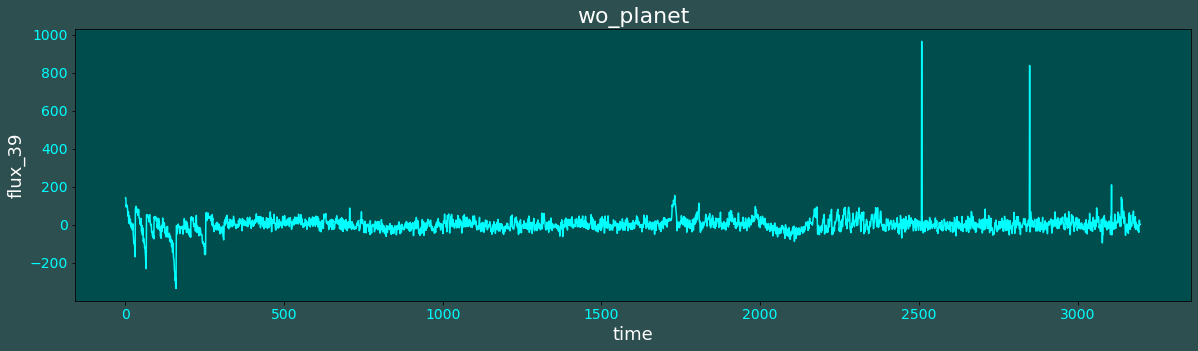

In [6]:
show_graph(True, dataset = exoTrain.loc[:, exoTrain.columns != 'LABEL'])

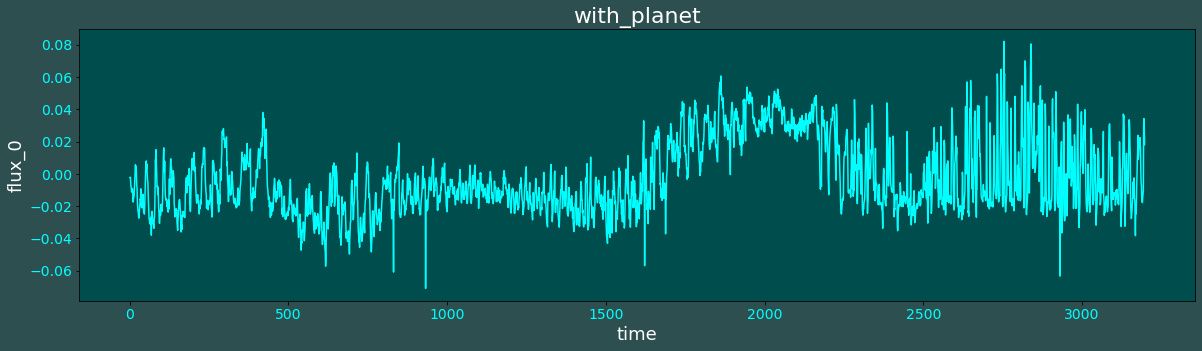

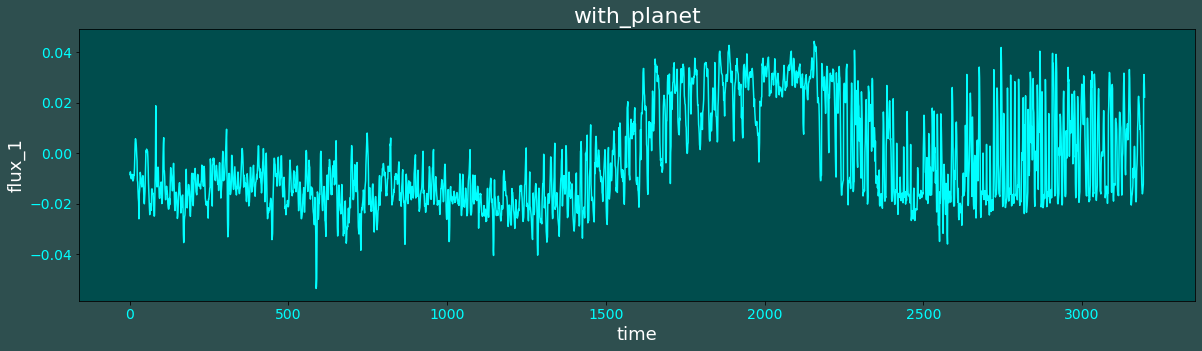

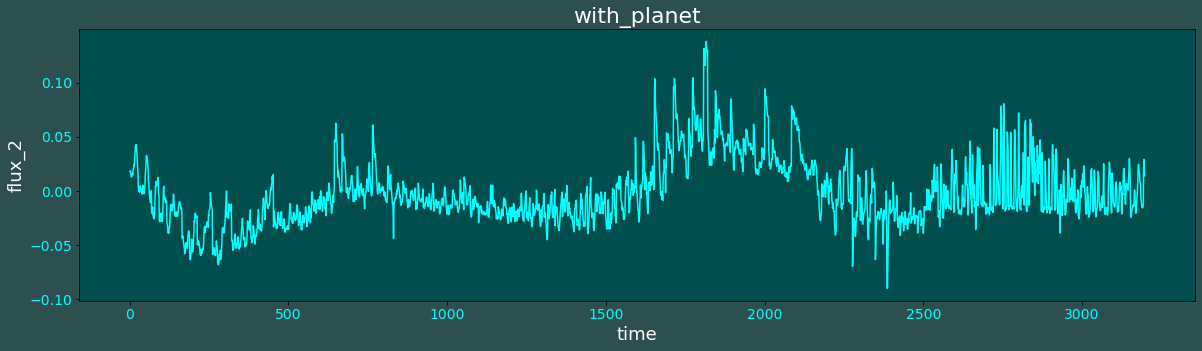

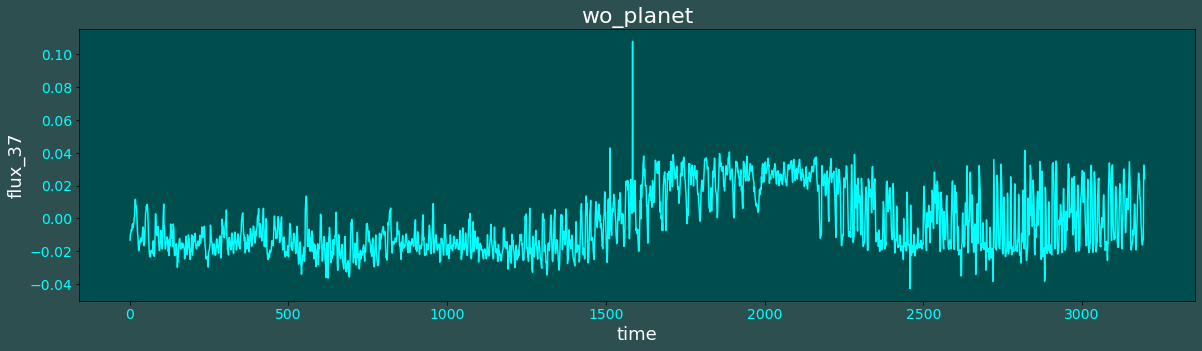

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(exoTrain.loc[:, exoTrain.columns != 'LABEL'])
show_graph(False, scaled_data)